In [205]:
import numpy as np 
import pandas as pd 

In [206]:
# Load data
df = pd.read_csv('./battery_motor_log(time specified).csv')
df.dropna(how = 'all', inplace = True) 
data = df.to_numpy()

In [207]:
data[0]

array(['6/5/2023', ' 22:21:54.854200', 3.689736, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [208]:
def str_to_ns(time_arr):
  time_arr_int = []
  for time_str in time_arr:
    time = [float(i) for i in time_str.split(":")]
    time = time[0] + time[1] / 60 + time[2] / 3600
    time_arr_int.append(int(time * 3600000000000))
  
  return time_arr_int

In [209]:
def matrix_extract(array, pos):

    # Transpose the array
    transposed_array = array.T

    # Convert each row of the transposed array to a list
    result_lists = [row.tolist() for row in transposed_array]

    # Print the result lists
    return result_lists[pos]

In [210]:
u1 = matrix_extract(data, 3)
u2 = matrix_extract(data, 4)
u3 = matrix_extract(data, 5)
u4 = matrix_extract(data, 6)
u5 = matrix_extract(data, 1)

# u5 = str_to_ns(u5)

N = len(u1)
ytrue = np.zeros(N)
y = matrix_extract(data, 2)

In [211]:
# List of nanosecond timestamp values 
timestamps = str_to_ns(u5)

# Convert to seconds  
timestamps_sec = [t/1e9 for t in timestamps]

# Calculate time intervals
time_intervals = np.diff(timestamps_sec)

# Check if constant 
is_constant_sampling = np.all(time_intervals == time_intervals[0])

print(is_constant_sampling)

False


In [212]:
u5

[' 22:21:54.854200',
 ' 22:21:55.728460',
 ' 22:21:55.761260',
 ' 22:21:56.761302',
 ' 22:21:56.764334',
 ' 22:21:57.767778',
 ' 22:21:57.800650',
 ' 22:21:58.771110',
 ' 22:21:58.835424',
 ' 22:21:59.777424',
 ' 22:21:59.773932',
 ' 22:22:00.781586',
 ' 22:22:00.778954',
 ' 22:22:01.789244',
 ' 22:22:01.778898',
 ' 22:22:02.784922',
 ' 22:22:02.847914',
 ' 22:22:03.826342',
 ' 22:22:03.793276',
 ' 22:22:04.727606',
 ' 22:22:04.770780',
 ' 22:22:05.839438',
 ' 22:22:05.733134',
 ' 22:22:06.764656',
 ' 22:22:06.776024',
 ' 22:22:07.736418',
 ' 22:22:07.769728',
 ' 22:22:08.723316',
 ' 22:22:08.772396',
 ' 22:22:09.804708',
 ' 22:22:09.838102',
 ' 22:22:10.839472',
 ' 22:22:10.705800',
 ' 22:22:11.718240',
 ' 22:22:11.748600',
 ' 22:22:12.750060',
 ' 22:22:12.739456',
 ' 22:22:13.752610',
 ' 22:22:13.729178',
 ' 22:22:14.721184',
 ' 22:22:14.711886',
 ' 22:22:15.696408',
 ' 22:22:15.726132',
 ' 22:22:16.760342',
 ' 22:22:16.746770',
 ' 23:16:00.553412',
 ' 23:16:00.552956',
 ' 23:16:01.5

In [213]:
from scipy.interpolate import interp1d 

# Nanosecond timestamp list
timestamps = u5

def time_to_seconds(time_str):
    time_parts_str = time_str.strip("[] ").split(':')
    hours = int(time_parts_str[0])
    minutes = int(time_parts_str[1])
    seconds = float(time_parts_str[2])
    return hours * 3600 + minutes * 60 + seconds

# Convert all time strings to seconds
time_in_seconds = [time_to_seconds(time_str) for time_str in timestamps]

print(time_in_seconds)

# Target sampling rate 
desired_hz = 100
desired_dt = 1/desired_hz

# Create evenly spaced time samples
time_new = np.arange(time_in_seconds[0], time_in_seconds[-1], desired_dt)

# Raw data corresponding to timestamps 
data_raw = u5
print(data_raw)


# Interpolate the data
interp_func = interp1d(time_in_seconds, range(len(time_in_seconds)))

# Verify sampling
print(np.diff(time_new).std())

[80514.8542, 80515.72846, 80515.76126, 80516.761302, 80516.764334, 80517.767778, 80517.80065, 80518.77111, 80518.835424, 80519.777424, 80519.773932, 80520.781586, 80520.778954, 80521.789244, 80521.778898, 80522.784922, 80522.847914, 80523.826342, 80523.793276, 80524.727606, 80524.77078, 80525.839438, 80525.733134, 80526.764656, 80526.776024, 80527.736418, 80527.769728, 80528.723316, 80528.772396, 80529.804708, 80529.838102, 80530.839472, 80530.7058, 80531.71824, 80531.7486, 80532.75006, 80532.739456, 80533.75261, 80533.729178, 80534.721184, 80534.711886, 80535.696408, 80535.726132, 80536.760342, 80536.74677, 83760.553412, 83760.552956, 83761.556266, 83761.608544, 83762.51856, 83762.552352, 83763.55203, 83763.559774, 83764.58754, 83764.553042, 83765.552264, 83765.552636, 83766.564252, 83766.58509, 83767.553492, 83767.540478, 83768.552708, 83768.585734, 83769.587296, 83769.583702, 83770.64337, 83770.554278, 83771.518262, 83771.519068, 83772.518916, 83772.55454, 83773.51832, 83773.52159, 

In [214]:
u5 = time_new

In [215]:
X1 = np.ones((N, 6))
X2 = np.ones((N, 11))
X3 = np.ones((N, 16))
X4 = np.ones((N, 21))

In [216]:
u1 = (u1 - np.mean(u1)) / np.std(u1) / 3
u2 = (u2 - np.mean(u2)) / np.std(u2) / 3
u3 = (u3 - np.mean(u3)) / np.std(u3) / 3
u4 = (u4 - np.mean(u4)) / np.std(u4) / 3
u5 = (u5 - np.mean(u5)) / np.std(u5) / 3

meany = np.mean(y)
stdy = np.std(y)

y = (y - meany) / stdy / 3

In [217]:
for k in range(1, N):    
    #filling X matrix
    X1[k, 1] = u1[k - 1]
    X1[k, 2] = u2[k - 1]
    X1[k, 3] = u3[k - 1]
    X1[k, 4] = u4[k - 1]
    X1[k, 5] = u5[k - 1]

In [218]:
for k in range(2, N):    
    #filling X matrix
    X2[k, 1] = u1[k - 1]
    X2[k, 2] = u1[k - 2]
    X2[k, 3] = u2[k - 1]
    X2[k, 4] = u2[k - 2]
    X2[k, 5] = u3[k - 1]
    X2[k, 6] = u3[k - 2]
    X2[k, 7] = u4[k - 1]
    X2[k, 8] = u4[k - 2]
    X2[k, 9] = u5[k - 1]
    X2[k, 10] = u5[k - 2]

In [219]:
for k in range(3, N):    
    #filling X matrix
    X3[k, 1] = u1[k - 1]
    X3[k, 2] = u1[k - 2]
    X3[k, 3] = u1[k - 3]
    X3[k, 4] = u2[k - 1]
    X3[k, 5] = u2[k - 2]
    X3[k, 6] = u2[k - 3]
    X3[k, 7] = u3[k - 1]
    X3[k, 8] = u3[k - 2]
    X3[k, 9] = u3[k - 3]
    X3[k, 10] = u4[k - 1]
    X3[k, 11] = u4[k - 2]
    X3[k, 12] = u4[k - 3]
    X3[k, 13] = u5[k - 1]
    X3[k, 14] = u5[k - 2]
    X3[k, 15] = u5[k - 3]

In [220]:
for k in range(4, N):    
    #filling X matrix
    X4[k, 1] = u1[k - 1]
    X4[k, 2] = u1[k - 2]
    X4[k, 3] = u1[k - 3]
    X4[k, 4] = u1[k - 4]
    X4[k, 5] = u2[k - 1]
    X4[k, 6] = u2[k - 2]
    X4[k, 7] = u2[k - 3]
    X4[k, 8] = u2[k - 4]
    X4[k, 9] = u3[k - 1]
    X4[k, 10] = u3[k - 2]
    X4[k, 11] = u3[k - 3]
    X4[k, 12] = u3[k - 4]
    X4[k, 13] = u4[k - 1]
    X4[k, 14] = u4[k - 2]
    X4[k, 15] = u4[k - 3]
    X4[k, 16] = u4[k - 4]
    X4[k, 17] = u5[k - 1]
    X4[k, 18] = u5[k - 2]
    X4[k, 19] = u5[k - 3]
    X4[k, 20] = u5[k - 4]

In [221]:
#====LNU with Least Squares

X1 = X1[1:, :]
X2 = X2[2:, :]
X3 = X3[3:, :]
X4 = X4[4:, :]

y1 = y[1 : ]
y2 = y[2 : ]
y3 = y[3 : ]
y4 = y[4 : ]

ytrue1 = ytrue[1 : ]
ytrue2 = ytrue[2 : ]
ytrue3 = ytrue[3 : ]
ytrue4 = ytrue[4 : ]

In [222]:
w1 = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y1)
w2 = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T), y2)
# w3 = np.dot(np.dot(np.linalg.inv(np.dot(X3.T, X3)), X3.T), y3)
w4 = np.dot(np.dot(np.linalg.inv(np.dot(X4.T, X4)), X4.T), y4)

yn1 = np.dot(X1, w1)   # neuron output
yn2 = np.dot(X2, w2)   # neuron output
# yn3 = np.dot(X3, w3)   # neuron output
yn4 = np.dot(X4, w4)   # neuron output

In [223]:
yn1 = yn1 * 3 * stdy + meany  # returning to original scale of data
yn2 = yn2 * 3 * stdy + meany  # returning to original scale of data
# yn3 = yn3 * 3 * stdy + meany  # returning to original scale of data
yn4 = yn4 * 3 * stdy + meany  # returning to original scale of data

y1 = y1 * 3 * stdy + meany
y2 = y2 * 3 * stdy + meany
y3 = y3 * 3 * stdy + meany
y4 = y4 * 3 * stdy + meany

e1 = y1 - yn1
e2 = y2 - yn2
# e3 = y3 - yn3
e4 = y4 - yn4
etrue1 = ytrue1 - yn1
etrue2 = ytrue2 - yn2
# etrue3 = ytrue3 - yn3
etrue4 = ytrue4 - yn4

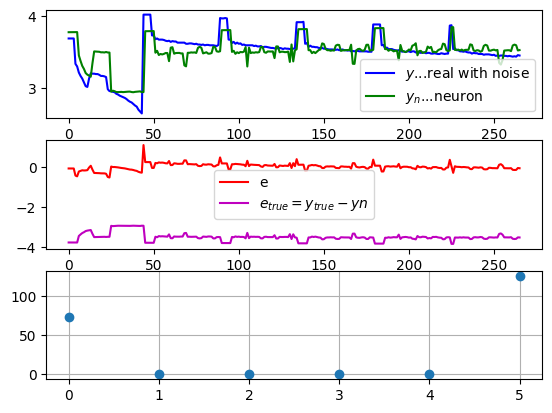

In [224]:
from matplotlib.pyplot import *

figure()
subplot(311)
plot(y1,'b',label="$y$...real with noise")
# plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn1,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e1,'r',label="e")
plot(etrue1,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w1,'o');grid()
show()

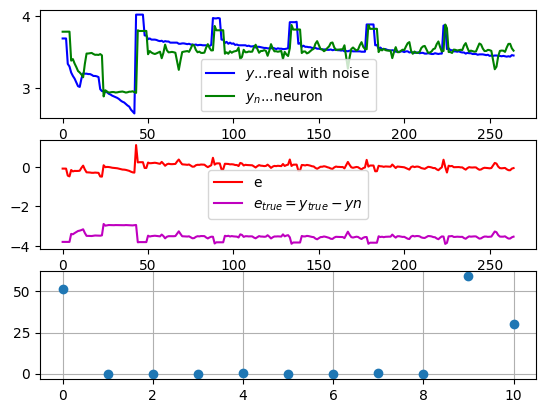

In [225]:
from matplotlib.pyplot import *

figure()
subplot(311)
plot(y2,'b',label="$y$...real with noise")
# plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn2,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e2,'r',label="e")
plot(etrue2,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w2,'o');grid()
show()

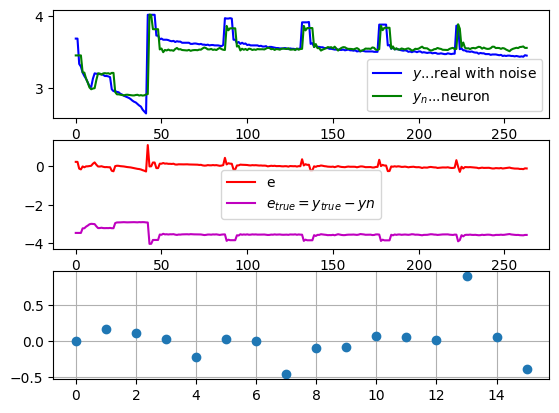

In [226]:
from matplotlib.pyplot import *

figure()
subplot(311)
plot(y3,'b',label="$y$...real with noise")
# plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn3,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e3,'r',label="e")
plot(etrue3,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w3,'o');grid()
show()

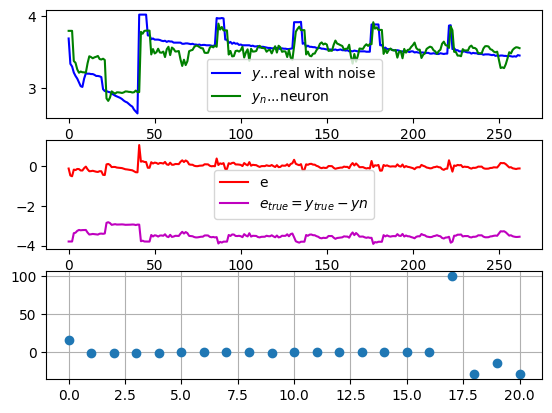

In [227]:
from matplotlib.pyplot import *

figure()
subplot(311)
plot(y4,'b',label="$y$...real with noise")
# plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn4,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e4,'r',label="e")
plot(etrue4,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w4,'o');grid()
show()

In [228]:
from scipy.stats import pearsonr

corr_val1 = pearsonr(y1, yn1) 
print('Validation correlation(time embedding be 1):', corr_val1[0])
corr_val2 = pearsonr(y2, yn2) 
print('Validation correlation(time embedding be 2):', corr_val2[0])
# corr_val3 = pearsonr(y3, yn3) 
# print('Validation correlation(time embedding be 3):', corr_val3[0])
corr_val4 = pearsonr(y4, yn4) 
print('Validation correlation(time embedding be 4):', corr_val4[0])

Validation correlation(time embedding be 1): 0.7769336910970932
Validation correlation(time embedding be 2): 0.7859150379179373
Validation correlation(time embedding be 4): 0.8036867450942942


In [229]:
# Calculate MSE
mse1 = np.mean((y1 - yn1)**2)
mse2 = np.mean((y2 - yn2)**2)
# mse3 = np.mean((y3 - yn3)**2)
mse4 = np.mean((y4 - yn4)**2)

print('MSE(time embedding be 1) :', mse1)
print('MSE(time embedding be 2) :', mse2)
# print('MSE(time embedding be 3) :', mse3)
print('MSE(time embedding be 4) :', mse4)

MSE(time embedding be 1) : 0.025739155254779995
MSE(time embedding be 2) : 0.024872416406899165
MSE(time embedding be 4) : 0.023122762716371714


In [230]:
# Root Mean Squared Error (RMSE)
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
# rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)

print('RMSE(time embedding be 1) :', rmse1)
print('RMSE(time embedding be 2) :', rmse2)
# print('RMSE(time embedding be 3) :', rmse3)
print('RMSE(time embedding be 4) :', rmse4)


RMSE(time embedding be 1) : 0.1604342708238486
RMSE(time embedding be 2) : 0.15770991220243313
RMSE(time embedding be 4) : 0.15206170693626886


In [231]:
# R-squared (R2) 
from sklearn.metrics import r2_score

r1 = r2_score(y1, yn1)
r2 = r2_score(y2, yn2)
# r3 = r2_score(y3, yn3)
r4 = r2_score(y4, yn4)

print('R-squared(time embedding be 1) :', r1)
print('R-squared(time embedding be 2) :', r2)
# print('R-squared(time embedding be 3) :', r3)
print('R-squared(time embedding be 4) :', r4)


R-squared(time embedding be 1) : 0.6036259603617532
R-squared(time embedding be 2) : 0.6176072504386928
R-squared(time embedding be 4) : 0.6456755292315544
